<a href="https://colab.research.google.com/github/munich-ml/MLPy2020/blob/master/16_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

- By convention the actual plot libraty `matplotlib.pyplot` is importet as **`plt`**.
- For global settings, `matplotlib` altogether may be imported as **`mpl`**.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [35]:
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 13

Switch style to **dark** for usage in **dark theme** IDEs

In [36]:
#plt.style.available
#plt.style.use('dark_background')

# Inline plots

The **magic command `%matplotlib`** controlls the plot output. Normally, it is set to `inline`.

In [37]:
%matplotlib inline

# Plot to interactive Qt console

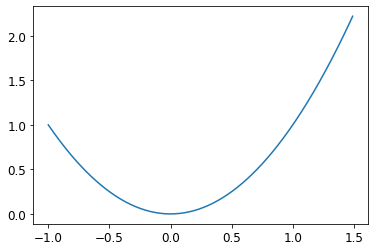

In [38]:
try:
    #import qtconsole
    from IPython import qt
    %matplotlib qt

except Exception as e:
    print(e)

else:
    x = np.arange(-1, 1.5, 0.01)
    plt.plot(x, np.power(x, 2))
    plt.show()

Switch back to inline for the rest of this notebook:

In [39]:
%matplotlib inline

# Create plots

Firstly we'll define a function (`plot_example_funcs`) and then custmize it further.

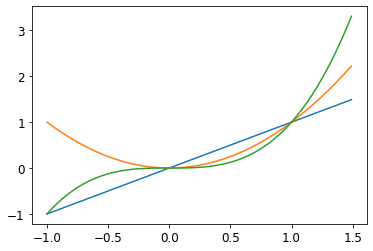

In [40]:
def plot_example_funcs():
    x = np.arange(-1, 1.5, 0.01)
    for exp in range(1, 4):
        plt.plot(x, np.power(x, exp), "-", label="$f(x)=x^{}$".format(exp))
    
plot_example_funcs()

## Add grid lines

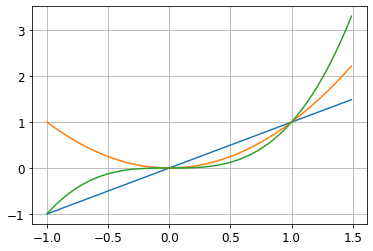

In [41]:
plot_example_funcs()
plt.grid();

## Add a legend

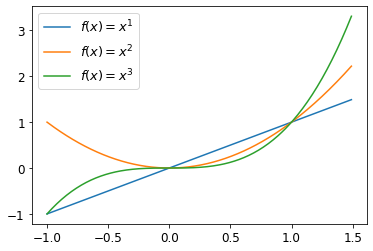

In [42]:
plot_example_funcs()
plt.legend();

## Set X and Y limits

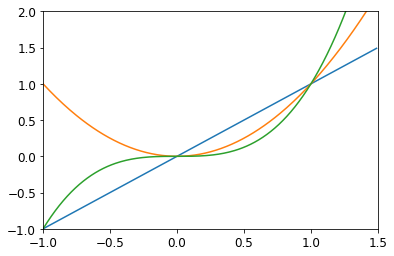

In [43]:
plot_example_funcs()
plt.xlim([-1, 1.5]), plt.ylim([-1, 2]);

## Set X and Y labels

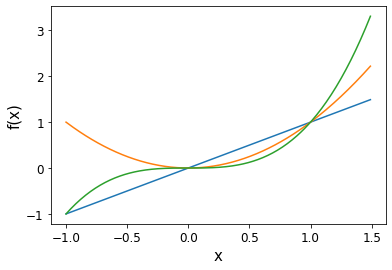

In [44]:
plot_example_funcs()
plt.xlabel("x"), plt.ylabel("f(x)");

## Define a figure size


The figure size has to be set, when creating the figure with `plt.figure()`.

Additionally, `plt.tight_layout()` should always be set, in order to use the complete plotting area.

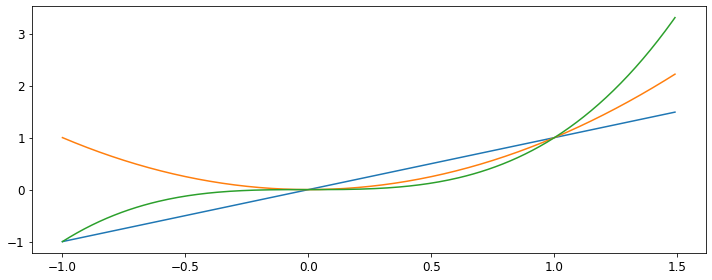

In [45]:
plt.figure(figsize=([10, 4]))
plot_example_funcs()
plt.tight_layout();

## The complete plot


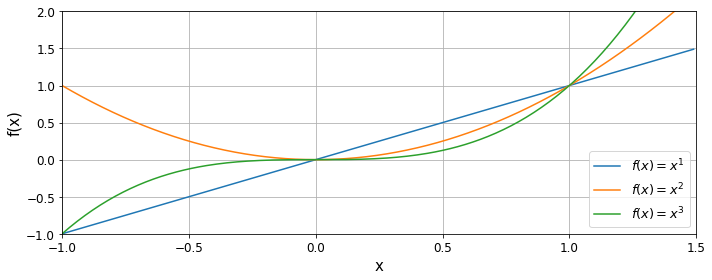

In [46]:
plt.figure(figsize=([10, 4]))
plot_example_funcs()
plt.xlim([-1, 1.5]), plt.ylim([-1, 2])
plt.xlabel("x"), plt.ylabel("f(x)")
plt.grid(), plt.legend(), plt.tight_layout();

# Interactivity in Jupyter Notebooks

Additional imports are required:

In [47]:
from ipywidgets import interact
from ipykernel.pylab.backend_inline import flush_figures

In order to add interactivity, the actual plotting function must have parameters. 

In [48]:
def plot_interactive_func(show_reference=True, exp=2, style="-"):
    x = np.arange(-1, 1.5, 0.1)
    plt.plot(x, np.power(x, exp), style, label="$f(x)=x^{}$".format(exp))
    if show_reference:
        plt.plot(x, x, "-", label="reference")
    plt.grid(), plt.legend(), plt.tight_layout()
    flush_figures()

The interactivity widget depends on the type of the input

- `bool` --> checkbox
- `int` --> slider
- `list` or `dict` --> combobox

In [49]:
interact(plot_interactive_func, show_reference=False, 
                                exp=(1, 5, 1), 
                                style=["-", ".", "o-"]);

interactive(children=(Checkbox(value=False, description='show_reference'), IntSlider(value=2, description='exp…

# `fig` and `ax` objects


In [50]:
x = np.arange(-1, 1.5, 0.01)
y = np.power(x, 3)

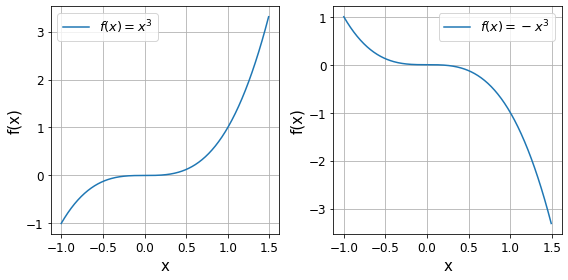

In [51]:
fig = plt.figure(figsize=[8, 4]) 
axes = fig.subplots(nrows=1, ncols=2)
axes[0].plot(x, y, label="$f(x)=x^3$")
axes[1].plot(x, -y, label="$f(x)=-x^3$")
for ax in axes:
    ax.grid(which="both")
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
fig.tight_layout()

# Contour 

- `matplotlib.pyplot.contour` creates contour plots
- `matplotlib.pyplot.contourf` creates filled contour plots


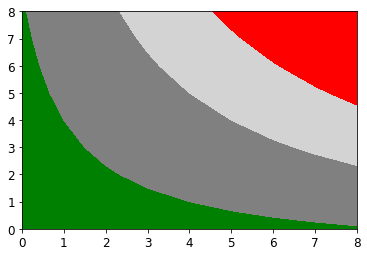

In [52]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['grey', 'lightgrey'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('green')
cs.changed()

# more examples
Go to [Matplotlib website](https://matplotlib.org/)